# Lab 1 | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.



### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.



### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):



- Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


**Read the Healthcare4all data set into the notebook**


In [2]:
categorical = pd.read_csv('files_for_lab/categorical7_02.csv')
numerical = pd.read_csv('files_for_lab/numerical7_02.csv')
targets = pd.read_csv('files_for_lab/target7_02.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
def drop(x):
    x = x.drop(columns='Unnamed: 0')
    return x
    
categorical = drop(categorical)
numerical = drop(numerical)
targets = drop(targets)

In [5]:
display(numerical.head(2))
display(targets.head(2))
display(categorical.head(2))
display(categorical.shape)

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0     8901      0  3712  60.0     5.0      5.0    0         0       39   
1     9401      1  5202  46.0     6.0      9.0   16         0       15   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   

   POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   

   ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   

   ETH15  ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   

   CHIL1  CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   

   CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   

   HHN3  HHN4  HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   

   DW3  DW4  DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   

   HU4  HU5  HHD1  HHD2  HHD3  HHD4  HHD5  HHD6  HHD7  HHD8  HHD9  HHD10  \
0    4    7    38    80    70    32    84    16     6     2     5      9   
1    3    9    59    94    88    55    95     5     4     1     3      5   

   HHD11  HHD12  ETHC1  ETHC2  ETHC3  ETHC4  ETHC5  ETHC6  HVP1  HVP2  HVP3  \
0     15      3     17     50     25      0      0      0     2     7    13   
1      4      2     18     44      5      0      0      0    97    98    98   

   HVP4  HVP5  HVP6  HUR1  HUR2  RHP1  RHP2  RHP3  RHP4  HUPA1  HUPA2  HUPA3  \
0    27    47     0     1    61    58    61    15     4      2      0      0   
1    98    99    94     0    83    76    73    21     5      0      0      0   

   HUPA4  HUPA5  HUPA6  HUPA7  RP1  RP2  RP3  RP4     MSA    ADI    DMA   IC1  \
0     14      1      0      0    2    5   17   73     0.0  177.0  682.0   307   
1      4      0      0      0   91   91   91   94  4480.0   13.0  803.0  1088   

    IC2   IC3   IC4    IC5  IC6  IC7  IC8  IC9  IC10  IC11  IC12  IC13  IC14  \
0   318   349   378  12883   13   23   23   23    15     1     0     0     1   
1  1096  1026  1037  36175    2    6    2    5    15    14    13    10    33   

   IC15  IC16  IC17  IC18  IC19  IC20  IC21  IC22  IC23  HHAS1  HHAS2  HHAS3  \
0     4    25    24    26    17     2     0     0     2     28      4     51   
1     2     5     2     5    15    14    14    10    32      6      2     66   

   HHAS4  MC1  MC2  MC3  TPE1  TPE2  TPE3  TPE4  TPE5  TPE6  TPE7  TPE8  TPE9  \
0      1   46   54    3    88     8     0     0     0     0     0     0     4   
1      3   56   44    9    80    14     0     0     0     0     0     0     6   

   PEC1  PEC2  TPE10  TPE11  TPE12  TPE13  LFC1  LFC2  LFC3  LFC4  LFC5  LFC6  \
0     1    13     14     16      2     45    56    64    50    64    44    62   
1     0     2     24     32     12     71    70    83    58    81    57    64   


TARGET_B  TARGET_D
0         0       0.0
1         0       0.0

OSOURCE STATE    ZIP MAILCODE NOEXCH MDMAUD  CLUSTER HOMEOWNR GENDER  \
0     GRI    IL  61081        A      0   XXXX       36        U      F   
1     BOA    CA  91326        A      0   XXXX       14        H      M   

   DATASRCE  SOLIH VETERANS RFA_2R RFA_2A GEOCODE2 DOMAIN_A  DOMAIN_B  
0       NaN    NaN      NaN      L      E        C        T         2  
1       3.0    NaN      NaN      L      G        A        S         1

(95412, 17)

In [6]:
categorical['VETERANS'] = categorical['VETERANS'].fillna('N')
categorical = categorical.drop(columns = ['OSOURCE','NOEXCH','SOLIH','MDMAUD','ZIP'])
categorical['DATASRCE'] = categorical['DATASRCE'].dropna()


In [7]:
#Categorical

encoder = OneHotEncoder(drop='first').fit(categorical)
encoded_categorical = encoder.transform(categorical).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
encoded_categorical

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.

In [8]:
transformer = StandardScaler().fit(numerical)
numerical_scaled = transformer.transform(numerical)

In [9]:
numerical_scaled = pd.DataFrame(numerical_scaled, columns = numerical.columns)

**Check the datatypes of all the columns in the data.**


In [10]:
all_data = pd.concat((numerical_scaled,targets,encoded_categorical),axis=1)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 409 entries, ODATEDW to 84
dtypes: float64(408), int64(1)
memory usage: 297.7 MB


**Check for null values in the dataframe. Replace the null values (if there).**

In [11]:
for i in all_data.isna().sum():
    print(i)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


**Xy Split - we want to filter the dataframe to only having the features, not the target.**
 

In [12]:
newdat = all_data[all_data['TARGET_B']==1]
X = newdat.drop(columns=['TARGET_B','TARGET_D'])
y = newdat['TARGET_D']

In [13]:
y

20        4.0
30        7.0
45        5.0
78       13.0
93       10.0
         ... 
95298    20.0
95309    15.0
95398     3.0
95403    10.0
95410    18.0
Name: TARGET_D, Length: 4843, dtype: float64

In [14]:
y.shape

(4843,)

In [15]:
y.value_counts()

10.00    941
15.00    591
20.00    577
5.00     503
25.00    392
        ... 
10.70      1
18.25      1
16.87      1
2.50       1
44.21      1
Name: TARGET_D, Length: 70, dtype: int64

**Fit the model with p-value reduction**

In [16]:
X_added_constant = sm.add_constant(X)
model = sm.OLS(y,X_added_constant).fit()
model.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TARGET_D   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     14.77
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:41:28   Log-Likelihood:                -17030.
No. Observations:                4843   AIC:                         3.486e+04
Df Residuals:                    4441   BIC:                         3.747e+04
Df Model:                         401                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2240      1.132     10.799      0.000      10.005      14.443
ODATEDW        0.3480      0.775      0.449      0.654      -1.172       1.868
TCODE         -0.0493      0.105     -0.468      0.640      -0.256       0.157
DOB            0.0866      0.208      0.417      0.677      -0.321       0.494
AGE            0.2670      0.203      1.317      0.188      -0.130       0.664
INCOME         0.1853      0.162      1.143      0.253      -0.132       0.503
WEALTH1       -0.0632      0.176     -0.360      0.719      -0.407       0.281
HIT           -0.1959      0.134     -1.461      0.144      -0.459       0.067
MALEMILI      -0.3120      0.253     -1.233      0.218      -0.808       0.184
MALEVET        0.3026      0.314      0.963      0.336      -0.313       0.919
VIETVETS       0.2649      0.273      0.971      0.332      -0.270       0.800
WWIIVETS      -0.3866      0.307     -1.257      0.209      -0.989       0.216
LOCALGOV       0.4463      0.262      1.705      0.088      -0.067       0.960
STATEGOV       0.1855      0.300      0.618      0.536      -0.403       0.774
FEDGOV         0.5492      0.333      1.651      0.099      -0.103       1.202
WEALTH2        0.2708      0.162      1.667      0.096      -0.048       0.589
POP901        -0.9498      1.299     -0.731      0.465      -3.497       1.598
POP902         0.4236      1.127      0.376      0.707      -1.786       2.633
POP903         0.2175      0.851      0.255      0.798      -1.452       1.887
POP90C1       27.5096     16.381      1.679      0.093      -4.606      59.625
POP90C2       18.1081     10.748      1.685      0.092      -2.964      39.180
POP90C3       23.2563     13.826      1.682      0.093      -3.850      50.363
POP90C4      -10.9735     24.748     -0.443      0.657     -59.492      37.545
POP90C5      -12.0548     25.645     -0.470      0.638     -62.331      38.222
ETH1          13.1912      4.713      2.799      0.005       3.951      22.431
ETH2          -2.0691      4.610     -0.449      0.654     -11.107       6.968
ETH3           0.2884      0.249      1.156      0.248      -0.201       0.778
ETH4           1.2058      1.018      1.185      0.236      -0.790       3.201
ETH5          -8.6823      3.332     -2.606      0.009     -15.215      -2.150
ETH6          -0.2125      0.189     -1.127      0.260      -0.582       0.157
ETH7          -0.0078      0.368     -0.021      0.983      -0.730       0.714
ETH8          -0.2794      0.374     -0.747      0.455      -1.012       0.453
ETH9          -0.4185      0.345     -1.214      0.225      -1.095       0.258
ETH10         -0.1670      0.177     -0.941      0.347      -0.515       0.181
ETH11         -0.2871      0.227     -1.264      0.206      -0.732       0.158
ETH12         -0.0606      0.231     -0.262      0.793      -0.513       0.392
ET

**Build a DF with the 20 features and outcome** 

*Filter P values to having a pvalue of < .05 and find the top 20 features to extract*
  

In [17]:
p = list(model.pvalues)
pp = pd.DataFrame(p, index=model.pvalues.index)
pvalues = pp[pp[0]<0.05]
pvalues.columns

RangeIndex(start=0, stop=1, step=1)

In [18]:
#sort the values to find the top 20
pvalues['vals'] = pvalues[0]
pvalues = pvalues.drop(0, axis = 1)
pvalues = pvalues.sort_values(by = 'vals')
pvalues

/var/folders/sm/8s2c1j894rq6v788yfhxt27r0000gn/T/ipykernel_2240/3588266017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvalues['vals'] = pvalues[0]


vals
LASTGIFT  6.275120e-106
73         5.835095e-36
const      7.487090e-27
MINRAMNT   6.382682e-15
RAMNTALL   1.360973e-12
RFA_2F     4.090205e-12
72         1.041018e-06
NGIFTALL   6.528146e-06
NEXTDATE   9.624924e-05
78         8.632701e-04
81         1.514473e-03
TIMELAG    2.356078e-03
ETH16      2.998692e-03
31         3.902358e-03
46         4.219645e-03
ETHC1      4.311842e-03
HUR1       4.321488e-03
50         4.859423e-03
ETH1       5.150191e-03
ETH13      5.539390e-03
ETH15      6.534553e-03
64         6.604569e-03
ETH14      8.638865e-03
ETH5       9.201054e-03
DMA        9.408151e-03
51         1.022372e-02
52         1.112410e-02
HC20       1.152232e-02
HC17       1.483170e-02
HUPA6      1.667198e-02
FISTDATE   2.021049e-02
49         2.749737e-02
ETHC2      2.751759e-02
57         3.290036e-02
HC18       3.328396e-02
HUPA5      3.417970e-02
HC19       3.459391e-02
65         3.838924e-02
61         3.912394e-02
AC2        3.960853e-02
HHD4       4.211797e-02
IC8        4.224594e-02
38         4.258160e-02

In [19]:
top30 = pvalues[0:30]
top30.drop('const', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
##Assign the columns to X
xcols = list(top30.index)

X = all_data[xcols]
y = all_data['TARGET_B']

- Split the data into a training set and a test set.



<AxesSubplot:>

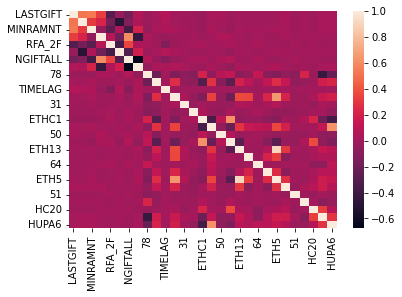

In [21]:
#Heatmap doesn't show us much
sns.heatmap(X.corr())


In [22]:
X = X[['LASTGIFT',73, 'MINRAMNT', 'RAMNTALL',   'RFA_2F',         72,
       'NGIFTALL', 'NEXTDATE',         78,         81,  'TIMELAG',    'ETH16',
               31,         46,    'ETHC1',     'HUR1',         50,     'ETH1',
          'ETH13',    'ETH15']]

In [23]:
X.shape, y.shape

((95412, 20), (95412,))

Extremely imbalanced - we will need to deal with this.

In [24]:
all_data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

**Model to compare the imbalanced data with balanced later on**

In [25]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
#Scaling
transformer = MinMaxScaler().fit(X_train)

#Normalising X_train/X_test
X_train_normalised = transformer.transform(X_train)
X_test_normalised = transformer.transform(X_test)

#Back into dfs
X_train_normalised = pd.DataFrame(X_train_normalised, columns = X_train.columns) 
X_test_normalised = pd.DataFrame(X_test_normalised, columns = X_test.columns) 
display(X_train_normalised.head())
display(X_train_normalised.shape)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LASTGIFT   73  MINRAMNT  RAMNTALL  RFA_2F   72  NGIFTALL  NEXTDATE   78  \
0     0.010  0.0     0.005  0.007392     1.0  1.0  0.041096  0.919711  1.0   
1     0.020  0.0     0.003  0.021859     0.0  1.0  0.136986  0.599759  0.0   
2     0.015  0.0     0.005  0.000528     0.0  1.0  0.006849  0.923725  0.0   
3     0.018  0.0     0.004  0.009398     0.0  1.0  0.054795  0.639101  0.0   
4     0.011  0.0     0.003  0.013939     0.0  0.0  0.136986  0.600562  0.0   

    81   TIMELAG     ETH16   31   46     ETHC1      HUR1   50      ETH1  \
0  0.0  0.003676  0.000000  0.0  0.0  0.160000  0.030303  0.0  0.717172   
1  0.0  0.007353  0.000000  0.0  0.0  0.280000  0.050505  1.0  0.979798   
2  0.0  0.010110  0.000000  0.0  1.0  0.306667  0.010101  0.0  1.000000   
3  0.0  0.010110  0.000000  0.0  0.0  0.280000  0.000000  0.0  0.989899   
4  0.0  0.006434  0.011628  0.0  0.0  0.280000  0.010101  0.0  1.000000   

      ETH13  ETH15  
0  0.010309    0.0  
1  0.010309    0.0  
2  0.010309    0.0  
3  0.000000    0.0  
4  0.010309    0.0

(71559, 20)

In [27]:
X_train_normalised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71559 entries, 0 to 71558
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LASTGIFT  71559 non-null  float64
 1   73        71559 non-null  float64
 2   MINRAMNT  71559 non-null  float64
 3   RAMNTALL  71559 non-null  float64
 4   RFA_2F    71559 non-null  float64
 5   72        71559 non-null  float64
 6   NGIFTALL  71559 non-null  float64
 7   NEXTDATE  71559 non-null  float64
 8   78        71559 non-null  float64
 9   81        71559 non-null  float64
 10  TIMELAG   71559 non-null  float64
 11  ETH16     71559 non-null  float64
 12  31        71559 non-null  float64
 13  46        71559 non-null  float64
 14  ETHC1     71559 non-null  float64
 15  HUR1      71559 non-null  float64
 16  50        71559 non-null  float64
 17  ETH1      71559 non-null  float64
 18  ETH13     71559 non-null  float64
 19  ETH15     71559 non-null  float64
dtypes: float64(20)
memory usage:

In [28]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 


**Logistic Regression**

We will perform a logistic regression to see the accuracy of an imbalanced dataset

In [29]:
classification_untreat = LogisticRegression(random_state=0, solver='saga', multi_class='multinomial').fit(X_train_normalised, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
classification_untreat.score(X_test_normalised, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9474279964784303

In [31]:
pred_untreat = classification_untreat.predict(X_test_normalised)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
print(metrics.classification_report(y_test, pred_untreat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22599
           1       0.00      0.00      0.00      1254

    accuracy                           0.95     23853
   macro avg       0.47      0.50      0.49     23853
weighted avg       0.90      0.95      0.92     23853



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


If we look at the precision, recall, and f1 score, we can see that 1 is not at all represented due to the sample size being so imbalances toward 0. We will need to treat this imbalance

**Treat for imbalance**

Here I have decided that i will downsample, as i want to preserve as much of the real data as possible. 

In [33]:
dcombine = pd.concat((y_train, X_train_normalised), axis =1)
dcombine.head()

TARGET_B  LASTGIFT   73  MINRAMNT  RAMNTALL  RFA_2F   72  NGIFTALL  \
0         0     0.010  0.0     0.005  0.007392     1.0  1.0  0.041096   
1         0     0.020  0.0     0.003  0.021859     0.0  1.0  0.136986   
2         0     0.015  0.0     0.005  0.000528     0.0  1.0  0.006849   
3         0     0.018  0.0     0.004  0.009398     0.0  1.0  0.054795   
4         0     0.011  0.0     0.003  0.013939     0.0  0.0  0.136986   

   NEXTDATE   78   81   TIMELAG     ETH16   31   46     ETHC1      HUR1   50  \
0  0.919711  1.0  0.0  0.003676  0.000000  0.0  0.0  0.160000  0.030303  0.0   
1  0.599759  0.0  0.0  0.007353  0.000000  0.0  0.0  0.280000  0.050505  1.0   
2  0.923725  0.0  0.0  0.010110  0.000000  0.0  1.0  0.306667  0.010101  0.0   
3  0.639101  0.0  0.0  0.010110  0.000000  0.0  0.0  0.280000  0.000000  0.0   
4  0.600562  0.0  0.0  0.006434  0.011628  0.0  0.0  0.280000  0.010101  0.0   

       ETH1     ETH13  ETH15  
0  0.717172  0.010309    0.0  
1  0.979798  0.010309    0.0  
2  1.000000  0.010309    0.0  
3  0.989899  0.000000    0.0  
4  1.000000  0.010309    0.0

In [34]:
yes = dcombine[dcombine['TARGET_B'] == 1]
no = dcombine[dcombine['TARGET_B'] == 0] 

The imbalance between yes and no is a difference of over 64000 rows. We will resample this to make them the same size

In [35]:
print('Yes',yes.shape)
print('No',no.shape)

Yes (3589, 21)
No (67970, 21)


In [36]:
nods = resample(no, replace=False, n_samples = len(yes))
print('Yes',yes.shape)
print('No',nods.shape)

Yes (3589, 21)
No (3589, 21)


**Combine the dataframes and check for nulls**

In [37]:
combined_under = pd.concat([yes,nods], axis = 0)
combined_under.isna().sum()

TARGET_B    0
LASTGIFT    0
73          0
MINRAMNT    0
RAMNTALL    0
RFA_2F      0
72          0
NGIFTALL    0
NEXTDATE    0
78          0
81          0
TIMELAG     0
ETH16       0
31          0
46          0
ETHC1       0
HUR1        0
50          0
ETH1        0
ETH13       0
ETH15       0
dtype: int64

**Fit a logistic regression model on the training data.**


In [38]:
#SPLIT X AND y for training

X_train_under = combined_under.drop(columns=['TARGET_B']) 
y_train_under = combined_under['TARGET_B']

In [39]:
classification_under = LogisticRegression(random_state=0, solver='saga', 
                                    multi_class='multinomial').fit(X_train_under, y_train_under)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [40]:
classification_under.score(X_test_normalised, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6156039072653335

**Check the accuracy on the test data.**

In [41]:
pred_under = classification_under.predict(X_test_normalised)
print(metrics.classification_report(y_test, pred_under)) 

              precision    recall  f1-score   support

           0       0.96      0.62      0.75     22599
           1       0.07      0.54      0.13      1254

    accuracy                           0.62     23853
   macro avg       0.52      0.58      0.44     23853
weighted avg       0.91      0.62      0.72     23853



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Here we can see that, as low as the scores are here, they are present for 1, due to a more balanced dataset

**Fit Decision Tree Regresion**

In [42]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()

model_pipeline = [model1, model2]
model_names = ['Decision Tree Classifier', 'Logistic Regression']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_under, y_train_under, cv=5))
    scores[model_name] = mean_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9

**Compare results**

In [43]:
print(scores)

{'Decision Tree Classifier': 0.526889054962973, 'Logistic Regression': 0.5720283792571312}


**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9498455819673277
0.9474279964784303


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0    22599
1     1254
Name: TARGET_B, dtype: int64

array([[22599,     0],
       [ 1254,     0]])

In [ ]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
